# Spectractor Launcher

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : March 29th 2018


In [2]:
theNotebook="Run_Spectractor"

# Spectractor Launcher

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [4]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

In [8]:
#sys.path.append("../common_tools/")
#from common_notebook import *
#init_notebook()

## Spectractor 

In [9]:
PATH_SPECTRACTOR='../../Spectractor'

In [10]:
sys.path.append(PATH_SPECTRACTOR)

In [11]:
from spectractor import *

In [12]:
from tools import *
from holo_specs import *
from targets import *
from optics import *
import parameters 

# Configuration

## Input Directory

### HD111980 is missing in logbook

In [13]:
if 0:
    inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
    MIN_IMGNUMBER=58
    #MAX_IMGNUMBER=80  # temporary
    MAX_IMGNUMBER=190
    date="20170530"
    object_name='HD111980'
    tag = "reduc"
    SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
    SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
    NBIMGPERROW=2
    subdir=os.path.basename(inputdir)

### So use HD205905

In [14]:
inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
#MIN_IMGNUMBER=208
MIN_IMGNUMBER=230
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [15]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./spectra"
#ensure_dir(outputdir)

In [16]:
#infile_fullpath=os.path.join(PATH_SPECTRACTOR,infile)

In [17]:
sys.path.append(PATH_SPECTRACTOR)

In [18]:
from spectractor import *

# Logbook

In [19]:
file_logbook_csv='../common_info/ctiofulllogbook_jun2017_v3.csv'
file_logbook_xlsx='../common_info/ctiofulllogbook_jun2017_v3.xlsx'

In [20]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [21]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [22]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [23]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for Spectractor

In [28]:
filex0y0dxdy=all_obs[['index','file','Obj-posXpix','Obj-posYpix','Dx','Dy']]

In [29]:
filex0y0dxdy.head()

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
71,210,reduc_20170530_210.fits,790.0,700.0,100.0,100.0
39,211,reduc_20170530_211.fits,790.0,700.0,100.0,100.0
5,212,reduc_20170530_212.fits,790.0,700.0,100.0,100.0
110,213,reduc_20170530_213.fits,790.0,700.0,100.0,100.0
149,214,reduc_20170530_214.fits,790.0,700.0,100.0,100.0


In [30]:
filex0y0dxdy.tail()

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
99,280,reduc_20170530_280.fits,785.0,685.0,100.0,100.0
53,281,reduc_20170530_281.fits,785.0,685.0,100.0,100.0
202,282,reduc_20170530_282.fits,785.0,685.0,100.0,100.0
137,283,reduc_20170530_283.fits,785.0,685.0,100.0,100.0
17,284,reduc_20170530_284.fits,760.0,672.0,100.0,100.0


### Select a few spectra for debugging


- def fit_multigauss_and_bgd(x,y,guess=[10,1000,1,0,0,1],bounds=(-np.inf,np.inf),sigma=None):
- maxfev=100000 au lieu de  maxfev=10000



In [35]:
filex0y0dxdy=filex0y0dxdy.loc[(filex0y0dxdy["index"]>235) &  (filex0y0dxdy["index"]<240),:]

In [36]:
filex0y0dxdy

,index,file,Obj-posXpix,Obj-posYpix,Dx,Dy
54,236,reduc_20170530_236.fits,790.0,700.0,100.0,100.0
133,237,reduc_20170530_237.fits,790.0,700.0,100.0,100.0
177,238,reduc_20170530_238.fits,790.0,700.0,100.0,100.0
238,239,reduc_20170530_239.fits,790.0,700.0,100.0,100.0


### Setting the parameters of Spectractor

In [37]:
parameters.DEBUG = True
parameters.VERBOSE = True

2018-03-30 14:29:43  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-30 14:29:43  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_236.fits...


spectrum  54


2018-03-30 14:29:44  Image      load                 INFO   
	Image loaded
2018-03-30 14:29:44  Image      load                 INFO   
	Loading disperser Thor300...


Load disperser Thor300:
	from ../../Spectractor/dispersers/Thor300
Grating characteristics:
	N = 299.51 +/- 0.99 grooves/mm
	Average tilt of -0.6 degrees
 MAIN_ID        RA           DEC      ... SP_TYPE  SP_QUAL      SP_BIBCODE    
             "h:m:s"       "d:m:s"    ...                                     
--------- ------------- ------------- ... -------- ------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ... G1.5IV-V       C 1989ApJS...71..245K


2018-03-30 14:29:46  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


../../Spectractor/spectractor.py:130: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_image = np.copy(self.data[y0-Dy:y0+Dy,x0-Dx:x0+Dx])


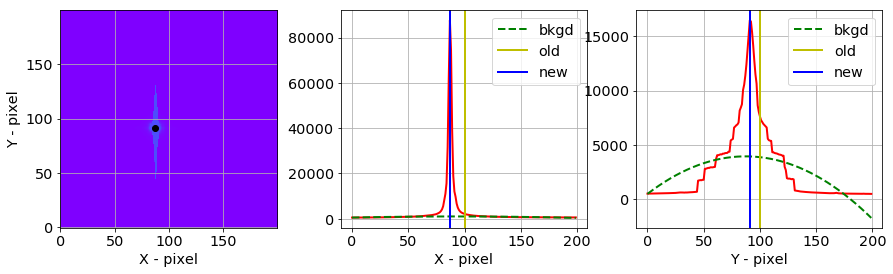

2018-03-30 14:29:46  Image      find_target          INFO   
	X,Y target position in pixels: 777.172,691.548


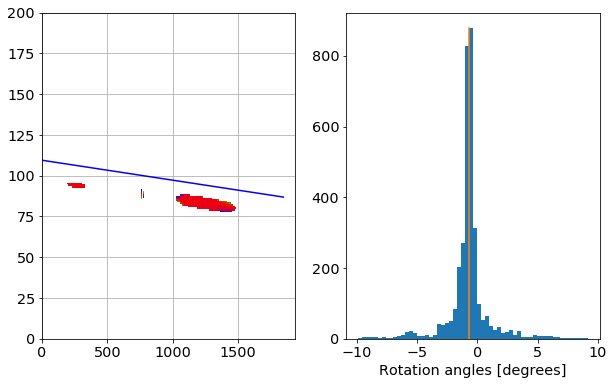

2018-03-30 14:29:47  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.70 degree
../../Spectractor/spectractor.py:252: RuntimeWarning: divide by zero encountered in log10
  ax1.imshow(np.log10(self.data[y0-parameters.YWINDOW:y0+parameters.YWINDOW,200:-200]),origin='lower',cmap='rainbow',aspect="auto")
../../Spectractor/spectractor.py:252: RuntimeWarning: invalid value encountered in log10
  ax1.imshow(np.log10(self.data[y0-parameters.YWINDOW:y0+parameters.YWINDOW,200:-200]),origin='lower',cmap='rainbow',aspect="auto")
../../Spectractor/spectractor.py:257: RuntimeWarning: invalid value encountered in log10
  ax2.imshow(np.log10(self.data_rotated[y0-parameters.YWINDOW:y0+parameters.YWINDOW,200:-200]),origin='lower',cmap='rainbow',aspect="auto")


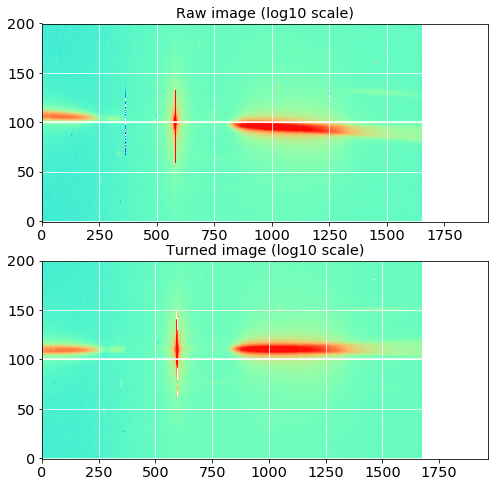

2018-03-30 14:29:49  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


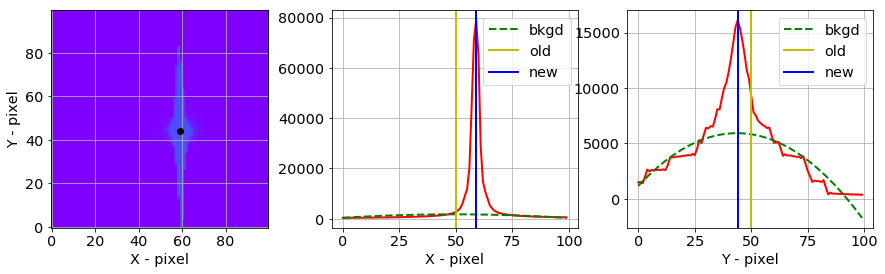

2018-03-30 14:29:50  Image      find_target          INFO   
	X,Y target position in pixels: 793.836,701.125
2018-03-30 14:29:50  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-30 14:29:50  Spectrum   __init__             INFO   
	Spectrum info copied from Image


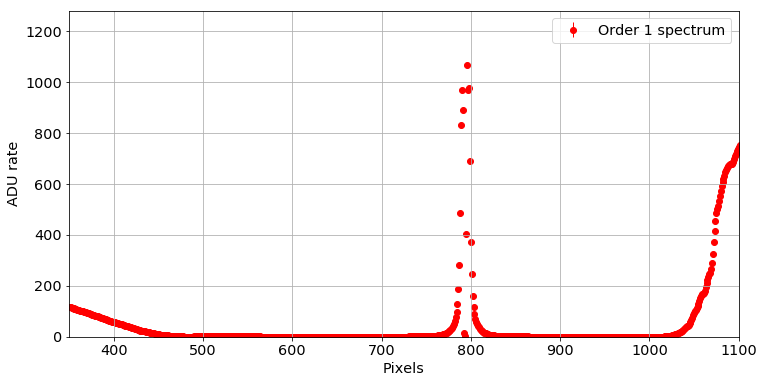

2018-03-30 14:29:50  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\alpha$     656.3  652.142 -4.15784 3.52497  -24.4266 10.7412
 $O_2(B)$   686.719   688.28  1.56058 5.32701  -14.6683 6.45016
    $O_2$     762.1  767.284   5.1844 11.8821  -44.0117  19.882
   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$H\alpha$     656.3  649.992  -6.30791 3.51369   -24.428 10.7418
 $O_2(B)$   686.719  686.021 -0.698435 5.31128  -14.6678  6.4499
    $O_2$     762.1  764.793   2.69307 11.8478  -44.0117  19.882
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\alpha$     656.3  649.457 -6.84

2018-03-30 14:29:51  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 0.52nm (after 3 steps)
	with D = 55.50 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 0.2 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\alpha$     656.3  649.457 -6.84325 3.51099  -24.4279 10.7418
 $O_2(B)$   686.719  685.458 -1.26093 5.30724  -14.6678  6.4499
    $O_2$     762.1  764.173   2.0727 11.8392  -44.0117  19.882
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$H\alpha$     656.3  649.457 -6.84325 3.51099  -24.4279 10.7418
 $O_2(B)$   686.719  685.458 -1.26093 5.30724  -14.6678  6.4499
    $O_2$     762.1  764.173   2.0727 11.8392  -44.0117  19.882


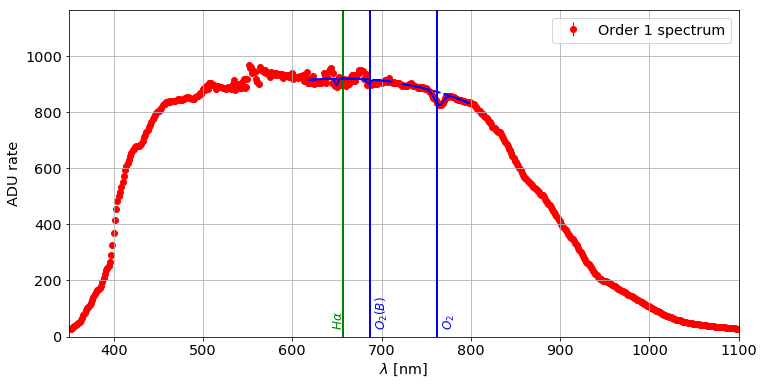

2018-03-30 14:29:51  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_236_spectrum.fits
2018-03-30 14:29:51  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-30 14:29:51  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_237.fits...
2018-03-30 14:29:51  Image      load                 INFO   
	Image loaded
2018-03-30 14:29:51  Image      load                 INFO   
	Loading disperser HoloPhP...


spectrum  133
Load disperser HoloPhP:
	from ../../Spectractor/dispersers/HoloPhP
Hologram characteristics:
	N = 355.08 +/- 1.15 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
	Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


2018-03-30 14:29:52  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_2     SP_BIBCODE_2   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


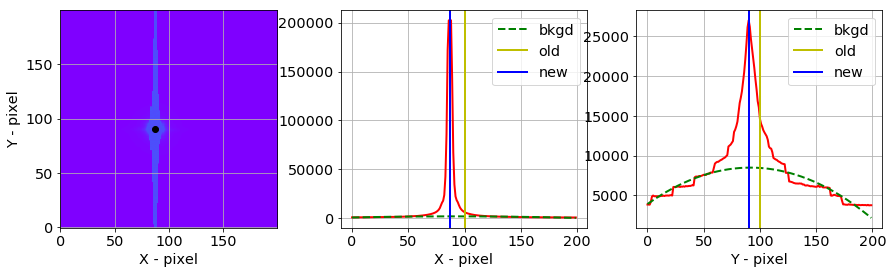

2018-03-30 14:29:53  Image      find_target          INFO   
	X,Y target position in pixels: 776.840,690.406


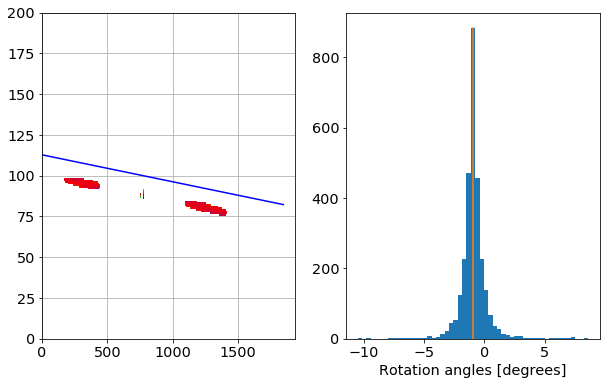

2018-03-30 14:29:53  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.95 degree


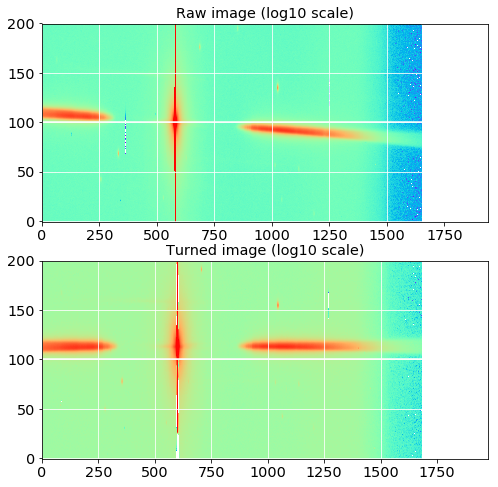

2018-03-30 14:29:56  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


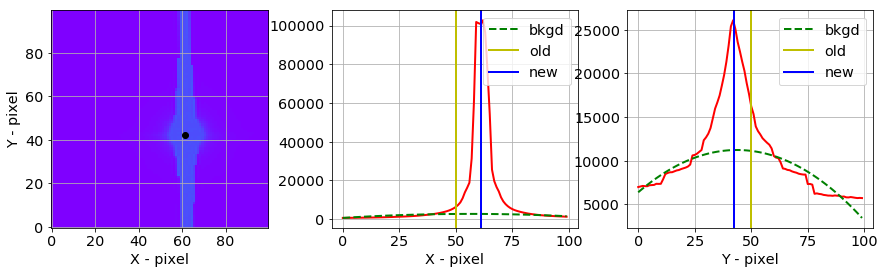

2018-03-30 14:29:56  Image      find_target          INFO   
	X,Y target position in pixels: 799.101,703.340
2018-03-30 14:29:56  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-30 14:29:56  Spectrum   __init__             INFO   
	Spectrum info copied from Image


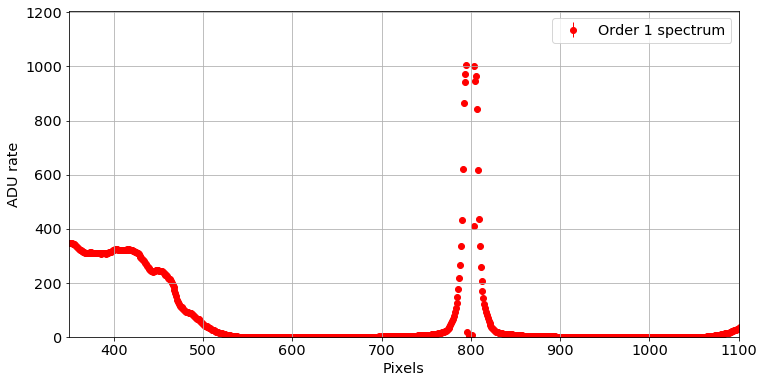

2018-03-30 14:29:57  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  381.719 -11.6469  16.485   -31.057  30.427
$Ca_{II}$   396.847  395.133 -1.71424 7.88534  -29.5191 28.9202
 $H\beta$     486.3  498.384  12.0837  16.485  -30.3212  29.706
    $O_2$     762.1  765.347  3.24713  16.485  -35.4648 36.2782
 $O_2(Z)$   822.696  801.869 -20.8266  16.485  -9.99487 10.2241
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   381.59 -11.7757  16.485  -31.0619 30.4318
$Ca_{II}$   396.847  395.001 -1.84562 7.88171   -29.521 28.9221
 $H\beta$     486.3  498.218  11.9177  16.485  -30.3247 29.7095
    $O_2$     762.1  765.104  3.00372  16.485  -35.4624 36.2758
 $O_2(Z)$   822.696  801.616 -21.0798  1

2018-03-30 14:29:58  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 2.20nm (after 2 steps)
	with D = 55.28 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -0.9 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   381.59 -11.7757  16.485  -31.0619 30.4318
$Ca_{II}$   396.847  395.001 -1.84562 7.88171   -29.521 28.9221
 $H\beta$     486.3  498.218  11.9177  16.485  -30.3247 29.7095
    $O_2$     762.1  765.104  3.00372  16.485  -35.4624 36.2758
 $O_2(Z)$   822.696  801.616 -21.0798  16.485   -9.9965 10.2258
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   381.59 -11.7757  16.485  -31.0619 30.4318
$Ca_{II}$   396.847  395.001 -1.84562 7.88171   -29.521 28.9221
 $H\beta$     486.3  498.218  11.9177  16.485  -30.3247 29.7095
    $O_2$     762.1  765.104  3.00372  16.485  -35.4624 36.2758
 $O_2(Z)$   822.696  801.616 -21.0798  1

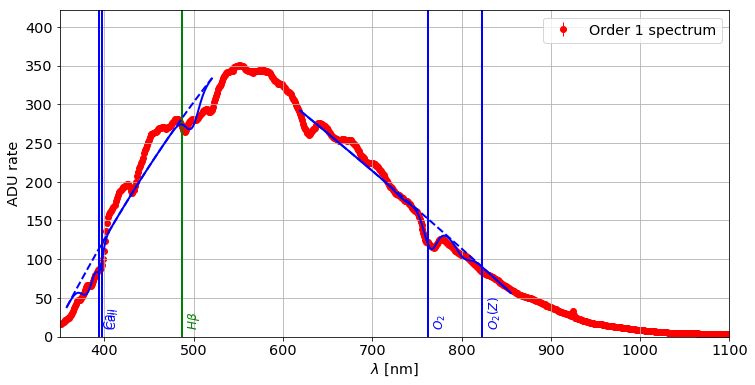

2018-03-30 14:29:58  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_237_spectrum.fits
2018-03-30 14:29:58  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-30 14:29:58  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_238.fits...
2018-03-30 14:29:58  Image      load                 INFO   
	Image loaded
2018-03-30 14:29:58  Image      load                 INFO   
	Loading disperser HoloPhAg...


spectrum  177
Load disperser HoloPhAg:
	from ../../Spectractor/dispersers/HoloPhAg
Hologram characteristics:
	N = 348.76 +/- 1.13 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


2018-03-30 14:29:59  spectractor Spectractor          INFO   
	Search for the target in the image...


 MAIN_ID        RA           DEC      ... SP_QUAL_3     SP_BIBCODE_3   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


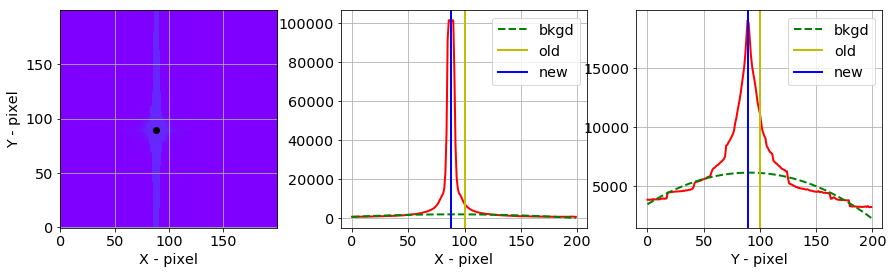

2018-03-30 14:29:59  Image      find_target          INFO   
	X,Y target position in pixels: 777.804,689.596
2018-03-30 14:29:59  Image      compute_rotation_angle_hessian WARNING 
	Interpolated angle and fitted angle disagrees with more than 10 pixels over 2048 pixels:  -2.00 vs -1.54


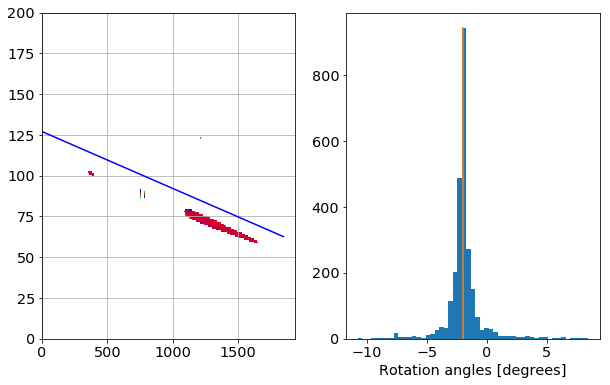

2018-03-30 14:30:00  Image      turn_image           INFO   
	Rotate the image with angle theta=-2.00 degree


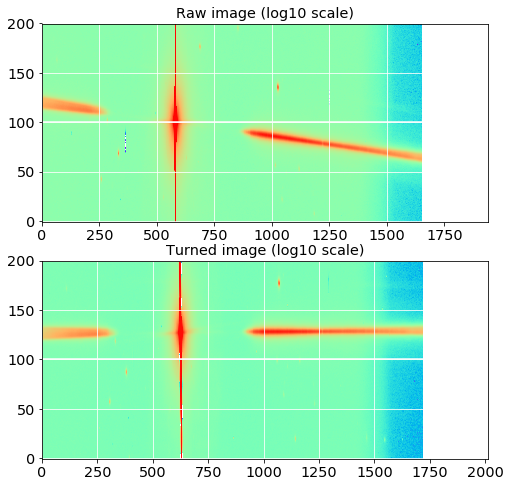

2018-03-30 14:30:02  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


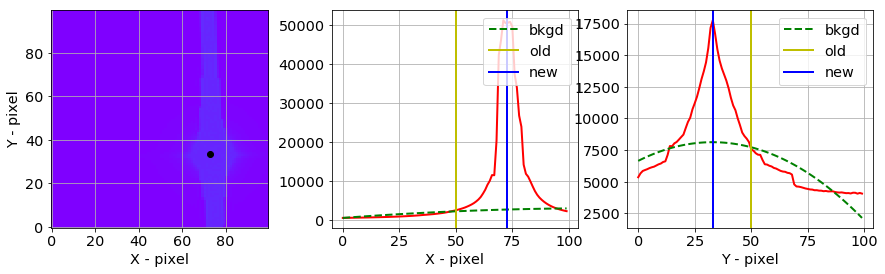

2018-03-30 14:30:03  Image      find_target          INFO   
	X,Y target position in pixels: 823.676,716.237
2018-03-30 14:30:03  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-30 14:30:03  Spectrum   __init__             INFO   
	Spectrum info copied from Image


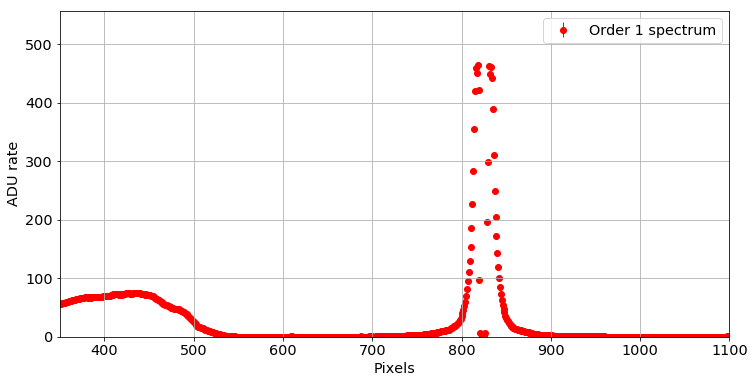

2018-03-30 14:30:03  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  362.335 -31.0313  16.485  -40.2848 68.6606
$Ca_{II}$   396.847  387.219 -9.62759  16.485  -40.6395 69.2651
 $H\beta$     486.3  501.195  14.8952  16.445  -33.0801 56.3809
$H\alpha$     656.3   661.29  4.99035 5.04175  -12.5201 19.0046
 $O_2(B)$   686.719  694.901  8.18189 5.76512  -13.2505 20.1132
    $O_2$     762.1  768.045  5.94465 7.33339  -34.1252 64.2712
 $O_2(Z)$   822.696  825.002  2.30612 11.4982   -2.6241 5.32357
  $H_2 O$     950.0  943.895 -6.10495  11.775  -3.36562 7.73171
  $H_2 O$     970.0  980.218  10.2181  11.775  -4.75836 10.9312
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   362.54 -30.8259  1

2018-03-30 14:36:34  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: 10.14nm (after 19 steps)
	with D = 54.66 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, -4.2 sigma shift)


   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366  366.072 -27.2939  16.485  -40.0197 68.2088
$Ca_{II}$   396.847  391.181 -5.66628  16.485  -40.3379 68.7511
 $H\beta$     486.3   506.27  19.9704 16.4824  -32.8259 55.9479
$H\alpha$     656.3  667.811  11.5112 5.08557  -12.5198 19.0041
 $O_2(B)$   686.719  701.713  14.9935 5.81391  -13.2503 20.1129
    $O_2$     762.1  775.468  13.3676 7.39317  -34.1253 64.2714
 $O_2(Z)$   822.696   832.88  10.1838 11.5912  -2.62412  5.3236
 $O_2(Y)$   898.765  905.796  7.03121 3.51269  -1.65233  3.5891
  $H_2 O$     950.0  952.553  2.55257  11.775  -2.46219 5.68009
  $H_2 O$     970.0  956.771 -13.2291 70.6497  -1.72491 3.97924
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- --

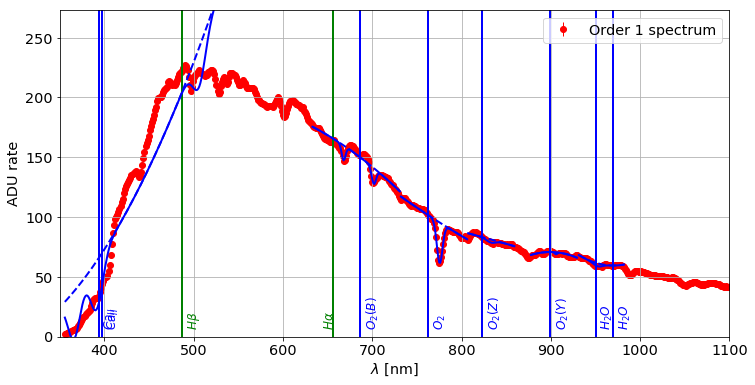

2018-03-30 14:36:39  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_238_spectrum.fits
2018-03-30 14:36:39  spectractor Spectractor          INFO   
	Start SPECTRACTOR
2018-03-30 14:36:39  Image      load                 INFO   
	Loading image /sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17/reduc_20170530_239.fits...
2018-03-30 14:36:39  Image      load                 INFO   
	Image loaded
2018-03-30 14:36:39  Image      load                 INFO   
	Loading disperser HoloAmAg...


spectrum  238
Load disperser HoloAmAg:
	from ../../Spectractor/dispersers/HoloAmAg
Hologram characteristics:
	N = 348.73 +/- 1.14 grooves/mm at plate center
	Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
	Hologram center at x0 = 1070.9 and y0 = 586.1 with average tilt of -1.9 degrees
Order  0 position at x0 = 805.1 and y0 = 595.0
Order +1 position at x0 = 1336.6 and y0 = 577.3
Distance between the orders: 531.79 pixels (12.76 mm)
 MAIN_ID        RA           DEC      ... SP_QUAL_4     SP_BIBCODE_4   
             "h:m:s"       "d:m:s"    ...                              
--------- ------------- ------------- ... --------- -------------------
HD 205905 21 39 10.1515 -27 18 23.668 ...         C 1989ApJS...71..245K


2018-03-30 14:36:40  spectractor Spectractor          INFO   
	Search for the target in the image...


Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_003.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_004.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_001.fits
Loading /pbs/throng/lsst/users/dagoret/External/PySynPhotData/grp/hst/cdbs/calspec/hd205905_stis_002.fits


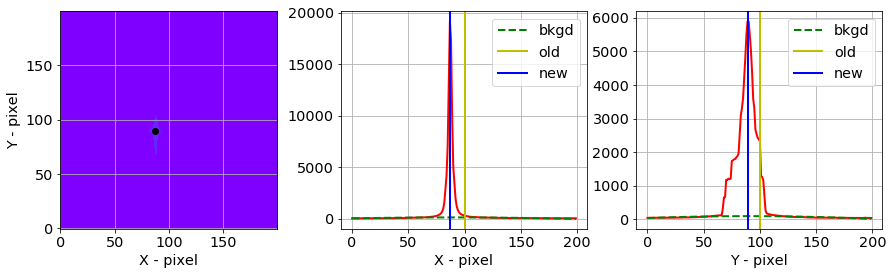

2018-03-30 14:36:41  Image      find_target          INFO   
	X,Y target position in pixels: 777.276,689.524


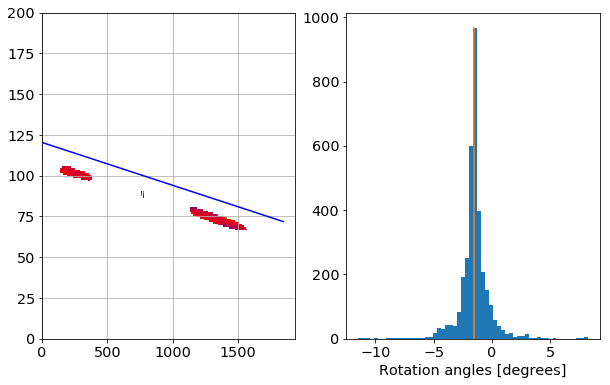

2018-03-30 14:36:41  Image      turn_image           INFO   
	Rotate the image with angle theta=-1.51 degree


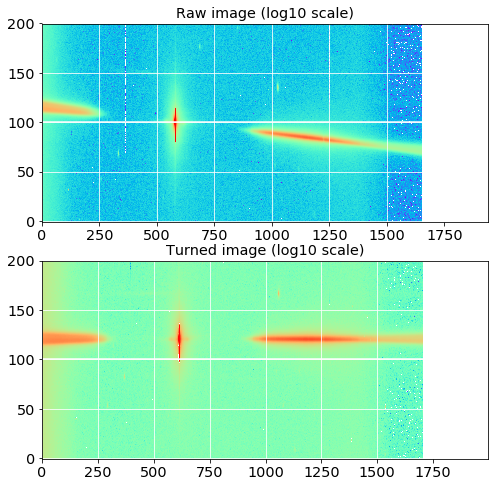

2018-03-30 14:36:44  spectractor Spectractor          INFO   
	Search for the target in the rotated image...


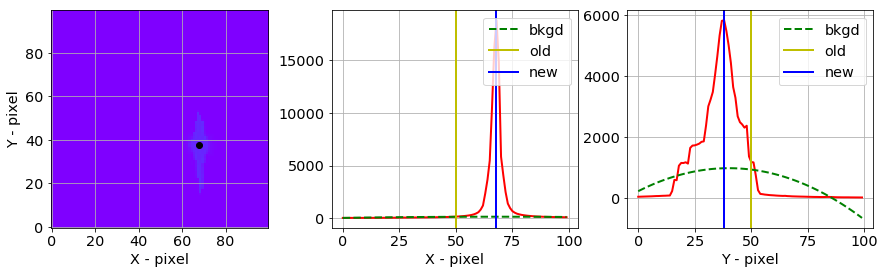

2018-03-30 14:36:44  Image      find_target          INFO   
	X,Y target position in pixels: 812.832,709.726
2018-03-30 14:36:44  Image      extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*3 pixels and background from 8 to 30 pixels
2018-03-30 14:36:44  Spectrum   __init__             INFO   
	Spectrum info copied from Image


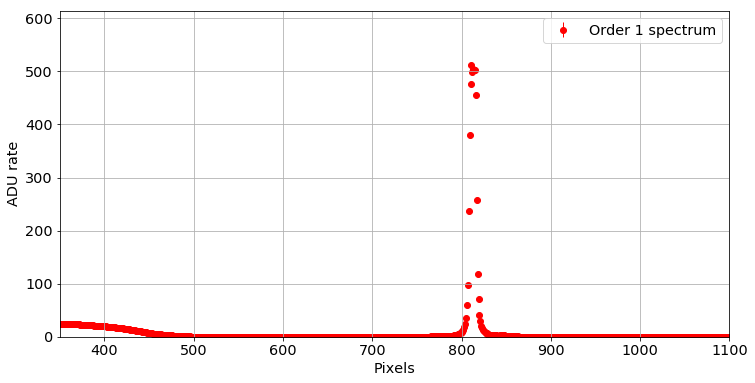

2018-03-30 14:36:44  Spectrum   calibrate_spectrum_with_lines INFO   
	Calibrating order 1 spectrum...


   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$Ca_{II}$   393.366  373.949  -19.4165  16.485 -0.593055 3.47439
$Ca_{II}$   396.847  391.517  -5.33021  16.485   -1.3428 7.86673
$H\delta$     410.2  407.221  -2.97942  16.485  -1.64219 9.62072
$H\gamma$     434.0  433.327 -0.673073  16.485  -1.93802 11.3538
$H\alpha$     656.3  642.571  -13.7294  16.485  -2.37079 5.82284
 $O_2(B)$   686.719  697.948   11.2288 4.90458  -4.04367 9.93156
    $O_2$     762.1    772.7   10.6003 7.97865  -15.7782 47.0973
 $O_2(Z)$   822.696  833.256   10.5599  16.485  -2.03243 6.06672
  $H_2 O$     950.0  956.499   6.49937 20.2313 -0.827479 5.29889
   Line   Tabulated Detected  Shift     FWHM  Amplitude   SNR  
              nm       nm       nm       nm                    
--------- --------- -------- -------- ------- --------- -------
$Ca_{II}$   393.366   372.69

2018-03-30 14:36:46  Spectrum   calibrate_spectrum_with_lines INFO   
	Wavelenght total shift: -6.74nm (after 8 steps)
	with D = 56.27 mm (DISTANCE2CCD = 55.45 +/- 0.19 mm, 4.3 sigma shift)


   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -------- --------- ------- --------- -------
$Ca_{II}$   393.366  372.991  -20.3746  16.485 -0.716691  4.1987
$Ca_{II}$   396.847  392.087  -4.75959  16.485  -1.67336 9.80331
$H\delta$     410.2  410.509  0.308517  16.485  -1.26154 7.39068
$H\gamma$     434.0    429.7  -4.29985  14.758  -1.80067 10.5491
$H\alpha$     656.3  655.263  -1.03704 6.27406  -3.39798 8.22222
 $O_2(B)$   686.719  688.297   1.57795 5.71104  -4.67561 11.3137
    $O_2$     762.1   762.19 0.0901211  8.4137   -16.425 45.1946
 $O_2(Z)$   822.696  826.858    4.1623  16.485   -1.5033 5.99375
  $H_2 O$     950.0   961.85   11.8497 68.8547  -5.35192  36.475
  $H_2 O$     970.0  981.553   11.5528 70.5037  -5.34544 36.4309
   Line   Tabulated Detected   Shift     FWHM  Amplitude   SNR  
              nm       nm        nm       nm                    
--------- --------- -----

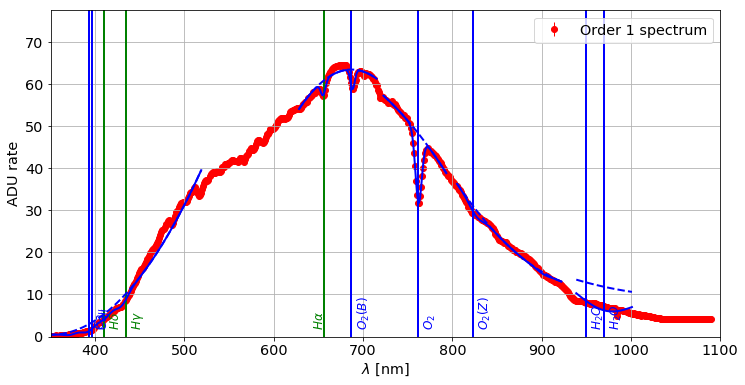

2018-03-30 14:36:46  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./spectra/reduc_20170530_239_spectrum.fits


In [38]:
for index, row in filex0y0dxdy.iterrows():
    full_filename=os.path.join(inputdir,row['file'])
    x0,y0=row['Obj-posXpix'], row['Obj-posYpix']
    print 'spectrum ',index
    Spectractor(full_filename,outputdir,[x0,y0],object_name)